<a href="https://colab.research.google.com/github/i-ganza007/AgriChatBot-Summative/blob/main/FinalModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import re
import unicodedata
from collections import Counter

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score

import tensorflow as tf
from transformers import T5Tokenizer, TFAutoModelForSeq2SeqLM, create_optimizer

2025-10-14 21:30:30.503081: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760477430.738244      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760477430.828685      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
from transformers import T5Tokenizer, TFAutoModelForSeq2SeqLM
from huggingface_hub import snapshot_download

MODEL_NAME = "t5-small"

try:
    tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME, trust_remote_code=False)
    model = TFAutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME, trust_remote_code=False)
except Exception as e:
    print(f"⚠️ Normal loading failed due to: {e}\nDownloading local snapshot instead...")
    local_dir = snapshot_download(repo_id=MODEL_NAME)
    tokenizer = T5Tokenizer.from_pretrained(local_dir)
    model = TFAutoModelForSeq2SeqLM.from_pretrained(local_dir)

print("\n✅ Model and tokenizer loaded successfully!")

text = "translate English to French: The farmer grows rice."
inputs = tokenizer(text, return_tensors="tf")
outputs = model.generate(**inputs)
print("\nResult:", tokenizer.decode(outputs[0], skip_special_tokens=True))

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

⚠️ Normal loading failed due to: 404 Client Error. (Request ID: Root=1-68eec10e-4a49605939a664b97658075d;40350ccc-fa75-4a6d-ba5b-64173519ec7e)

Entry Not Found for url: https://huggingface.co/api/models/google-t5/t5-small/tree/main/additional_chat_templates?recursive=false&expand=false.
additional_chat_templates does not exist on "main"


Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/537 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/8.47k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

onnx/decoder_model_merged.onnx:   0%|          | 0.00/233M [00:00<?, ?B/s]

flax_model.msgpack:   0%|          | 0.00/242M [00:00<?, ?B/s]

onnx/decoder_model.onnx:   0%|          | 0.00/232M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

onnx/decoder_model_merged_quantized.onnx:   0%|          | 0.00/58.7M [00:00<?, ?B/s]

onnx/decoder_model_quantized.onnx:   0%|          | 0.00/58.4M [00:00<?, ?B/s]

onnx/decoder_with_past_model.onnx:   0%|          | 0.00/220M [00:00<?, ?B/s]

onnx/decoder_with_past_model_quantized.o(…):   0%|          | 0.00/55.2M [00:00<?, ?B/s]

onnx/encoder_model.onnx:   0%|          | 0.00/141M [00:00<?, ?B/s]

onnx/encoder_model_quantized.onnx:   0%|          | 0.00/35.5M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

rust_model.ot:   0%|          | 0.00/242M [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/242M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
I0000 00:00:1760477461.893133      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1760477461.893910      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend m


✅ Model and tokenizer loaded successfully!


I0000 00:00:1760477466.181687     134 service.cc:148] XLA service 0x7ec07c013d20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760477466.182416     134 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1760477466.182433     134 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1760477466.258088     134 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1760477466.355351     134 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Result: L'agriculteur cultive du riz.


In [ ]:
import transformers
print(f"Transformers version: {transformers.__version__}")

# Fix for Transformers v4.45+ chat template bug
if hasattr(transformers, '__version__'):
    major, minor = map(int, transformers.__version__.split('.')[:2])
    if major >= 4 and minor >= 45:
        print("⚠ Detected Transformers v4.45+, applying chat template workaround...")
        import transformers.utils.hub as hub_utils
        original_list_repo_templates = hub_utils.list_repo_templates

        def patched_list_repo_templates(*args, **kwargs):
            try:
                return original_list_repo_templates(*args, **kwargs)
            except Exception:
                return []

        hub_utils.list_repo_templates = patched_list_repo_templates
        print("✓ Workaround applied!")

from transformers import T5Tokenizer, TFAutoModelForSeq2SeqLM, create_optimizer

try:
    from rouge_score import rouge_scorer
    ROUGE_AVAILABLE = True
except ImportError:
    ROUGE_AVAILABLE = False

Transformers version: 4.53.3
⚠ Detected Transformers v4.45+, applying chat template workaround...
✓ Workaround applied!


In [ ]:
import pandas as pd
df = pd.read_parquet("hf://datasets/KisanVaani/agriculture-qa-english-only/data/train-00000-of-00001.parquet")
df = df[['question', 'answers']].drop_duplicates().dropna()
print(f"Dataset shape: {df.shape}")

Dataset shape: (2331, 2)


In [ ]:
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
def clean_text_t5(text):
    """Optimized cleaning for T5 fine-tuning (keeps semantics intact)"""
    if not isinstance(text, str):
        return ""

    text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"\s*([?.!,])\s*", r"\1 ", text)
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9?.!,']+", " ", text)
    tokens = [w for w in text.split() if len(w) > 1]
    text = " ".join(tokens)
    text = re.sub(r"\s+", " ", text).strip()
    return text

Dataset shape after cleaning: (2331, 4)


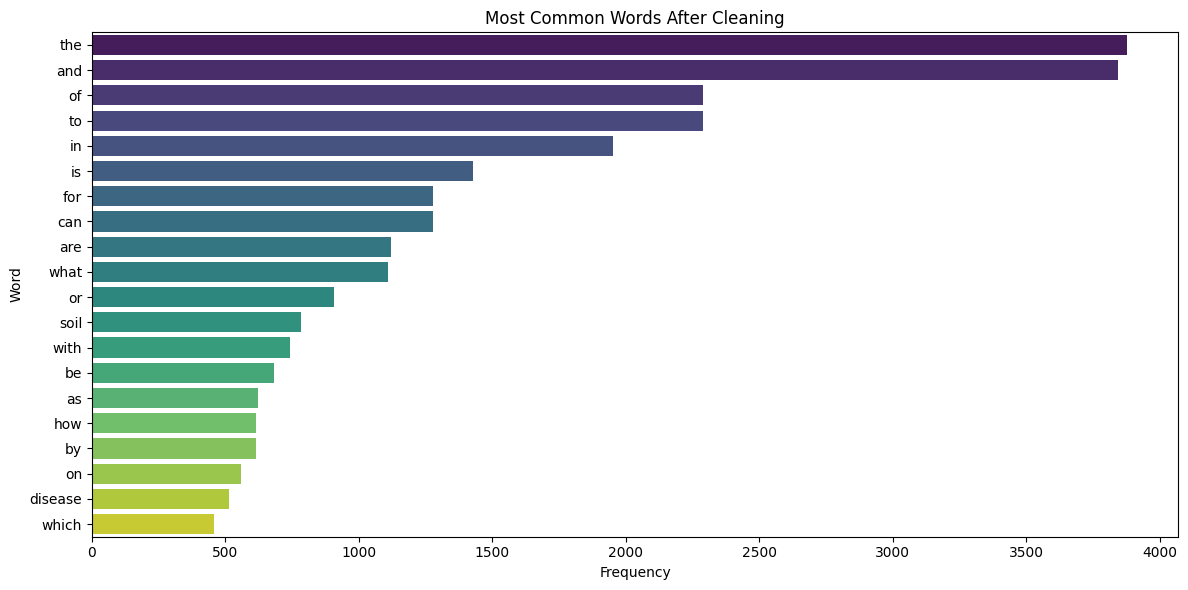

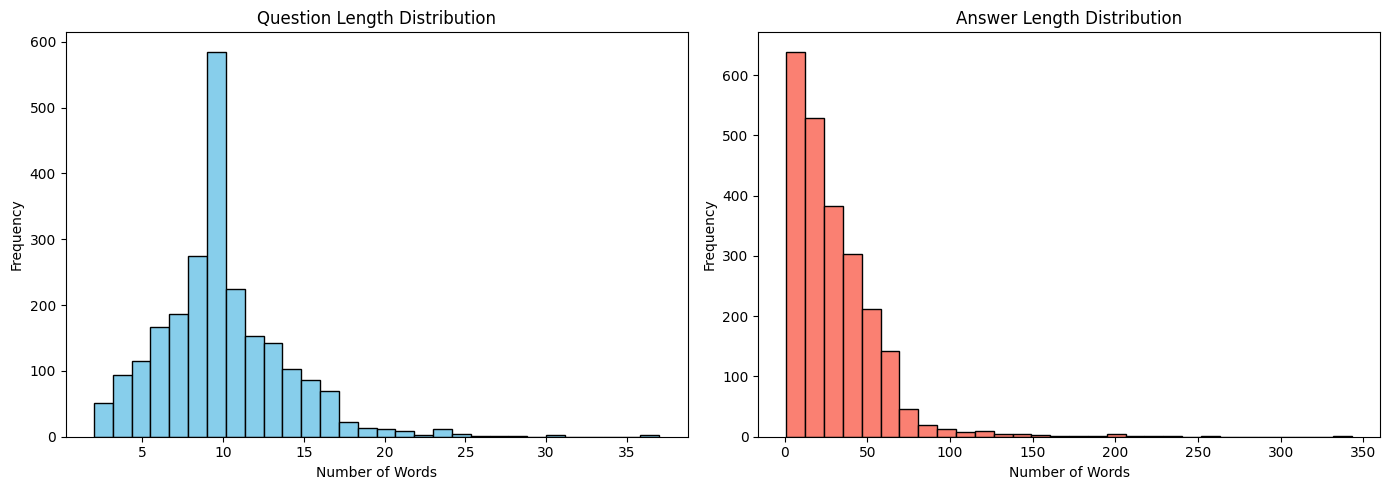

Avg question length: 9.83 words
Avg answer length: 30.02 words


In [ ]:
df['question_cleaned'] = df['question'].apply(clean_text_t5)
df['answers_cleaned'] = df['answers'].apply(clean_text_t5)

df = df[(df['question_cleaned'].str.len() > 0) & (df['answers_cleaned'].str.len() > 0)]
print(f"Dataset shape after cleaning: {df.shape}")

all_words = ' '.join(df['question_cleaned'].tolist() + df['answers_cleaned'].tolist()).split()
common_words = Counter(all_words).most_common(20)
df_common_words = pd.DataFrame(common_words, columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=df_common_words, palette='viridis')
plt.title('Most Common Words After Cleaning')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

df['question_length'] = df['question_cleaned'].str.split().str.len()
df['answer_length'] = df['answers_cleaned'].str.split().str.len()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df['question_length'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Question Length Distribution')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['answer_length'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Answer Length Distribution')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Avg question length: {df['question_length'].mean():.2f} words")
print(f"Avg answer length: {df['answer_length'].mean():.2f} words")

In [ ]:
MODEL_NAME = "t5-small"
MAX_INPUT_LENGTH = 256
MAX_TARGET_LENGTH = 128
BATCH_SIZE = 32
EPOCHS = 30
LEARNING_RATE = 1e-4
VALIDATION_SPLIT = 0.1
DROPOUT_RATE = 0.15
L2_REG = 1e-5
CLIP_NORM = 1.0
WARMUP_STEPS = 800
LABEL_SMOOTHING = 0.05
print("GPUs available:", len(tf.config.list_physical_devices('GPU')))

try:
    tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME, trust_remote_code=False)
    model = TFAutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME, trust_remote_code=False)
except Exception as e:
    print(f"⚠️ Normal loading failed due to: {e}\nDownloading local snapshot instead...")
    local_dir = snapshot_download(repo_id=MODEL_NAME)
    tokenizer = T5Tokenizer.from_pretrained(local_dir)
    model = TFAutoModelForSeq2SeqLM.from_pretrained(local_dir)

print("\nModel and tokenizer loaded successfully!")

task_prefix = "qa: "
questions = [
    f"{task_prefix}question: {q} context: agricultural domain"
    for q in df['question_cleaned'].tolist()
]
answers = [
    a if a.endswith(('.', '?', '!')) else a + '.'
    for a in df['answers_cleaned'].tolist()
]

print(f"Sample question (cleaned): {questions[0][:100]}...")
print(f"Sample answer (cleaned): {answers[0][:100]}...")

GPUs available: 2
⚠️ Normal loading failed due to: 404 Client Error. (Request ID: Root=1-68eec126-21e9415a01b95718395a2dab;9467c7e7-63cf-48fe-be5e-d0f304b91879)

Entry Not Found for url: https://huggingface.co/api/models/google-t5/t5-small/tree/main/additional_chat_templates?recursive=false&expand=false.
additional_chat_templates does not exist on "main"


Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.



Model and tokenizer loaded successfully!
Sample question (cleaned): qa: question: why is crop rotation important in farming? context: agricultural domain...
Sample answer (cleaned): this helps to prevent soil erosion and depletion, and can also help to control pests and diseases....


In [ ]:
question_tokens = tokenizer(
    questions,
    padding='max_length',
    truncation=True,
    max_length=MAX_INPUT_LENGTH,
    return_tensors="tf"
)
answer_tokens = tokenizer(
    answers,
    padding='max_length',
    truncation=True,
    max_length=MAX_TARGET_LENGTH,
    return_tensors="tf"
)

labels = tf.where(
    answer_tokens['input_ids'] == tokenizer.pad_token_id,
    -100,
    answer_tokens['input_ids']
)

indices = np.arange(len(questions))
train_idx, val_idx = train_test_split(indices, test_size=VALIDATION_SPLIT, random_state=42)

train_input_ids = tf.gather(question_tokens['input_ids'], train_idx)
train_attention_mask = tf.gather(question_tokens['attention_mask'], train_idx)
train_labels = tf.gather(labels, train_idx)

val_input_ids = tf.gather(question_tokens['input_ids'], val_idx)
val_attention_mask = tf.gather(question_tokens['attention_mask'], val_idx)
val_labels = tf.gather(labels, val_idx)

print(f"Training samples: {len(train_idx)}")
print(f"Validation samples: {len(val_idx)}")

Training samples: 2097
Validation samples: 234


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': train_input_ids,
        'attention_mask': train_attention_mask,
        'labels': train_labels
    },
    train_labels
)).shuffle(1024).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': val_input_ids,
        'attention_mask': val_attention_mask,
        'labels': val_labels
    },
    val_labels
)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

print(f"✓ Datasets created!")
print(f"  Training batches: {len(train_dataset)}")
print(f"  Validation batches: {len(val_dataset)}")

for batch in train_dataset.take(1):
    inputs, targets = batch
    print(f"  ✓ Batch shape check passed")
    print(f"    - Input IDs: {inputs['input_ids'].shape}")
    print(f"    - Attention Mask: {inputs['attention_mask'].shape}")
    print(f"    - Labels: {inputs['labels'].shape}")
    break

✓ Datasets created!
  Training batches: 66
  Validation batches: 8
  ✓ Batch shape check passed
    - Input IDs: (32, 256)
    - Attention Mask: (32, 256)
    - Labels: (32, 128)


In [ ]:
import tensorflow as tf

def masked_sparse_categorical_accuracy(y_true, y_pred):
    y_pred_ids = tf.argmax(y_pred, axis=-1, output_type=tf.int32)
    mask = tf.not_equal(y_true, -100)
    matches = tf.equal(y_true, tf.cast(y_pred_ids, y_true.dtype))
    matches = tf.logical_and(matches, mask)
    accuracy = tf.reduce_sum(tf.cast(matches, tf.float32)) / tf.reduce_sum(tf.cast(mask, tf.float32))
    return accuracy

class WarmupLinearDecay(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_lr, min_lr, warmup_steps, total_steps):
        super().__init__()
        self.initial_lr = initial_lr
        self.min_lr = min_lr
        self.warmup_steps = warmup_steps
        self.total_steps = total_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)
        warmup_steps_f = tf.cast(self.warmup_steps, tf.float32)
        total_steps_f = tf.cast(self.total_steps, tf.float32)

        warmup_lr = (step / warmup_steps_f) * self.initial_lr
        decay_lr = self.initial_lr - ((step - warmup_steps_f) / (total_steps_f - warmup_steps_f)) * (self.initial_lr - self.min_lr)
        return tf.where(step < warmup_steps_f, warmup_lr, decay_lr)

# Total steps
steps_per_epoch = len(train_dataset) if hasattr(train_dataset, '__len__') else 1000
total_steps = steps_per_epoch * EPOCHS
warmup_steps = 100

lr_schedule = WarmupLinearDecay(
    initial_lr=1e-3,
    min_lr=1e-6,
    warmup_steps=warmup_steps,
    total_steps=total_steps
)

optimizer = tf.keras.optimizers.Nadam(
    learning_rate=lr_schedule,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-7,
    clipnorm=CLIP_NORM
)

model.compile(
    optimizer=optimizer,
    metrics=[masked_sparse_categorical_accuracy]
)

model.summary()

Model: "tft5_for_conditional_generation_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 shared (Embedding)          multiple                  16449536  
                                                                 
 encoder (TFT5MainLayer)     multiple                  35330816  
                                                                 
 decoder (TFT5MainLayer)     multiple                  41625344  
                                                                 
Total params: 60506624 (230.81 MB)
Trainable params: 60506624 (230.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import os
from tf_keras.src.callbacks import ModelCheckpoint, EarlyStopping, LambdaCallback

checkpoint_dir = "checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

best_model_path = f"{checkpoint_dir}/t5_best.weights.h5"
backup_path = f"{checkpoint_dir}/t5_backup.weights.h5"
epoch_file = f"{checkpoint_dir}/last_epoch.txt"

# Track the last completed epoch (for resuming)
initial_epoch = 0
if os.path.exists(epoch_file):
    try:
        with open(epoch_file, "r") as f:
            initial_epoch = int(f.read().strip())
        print(f"Resuming training from epoch {initial_epoch}...")
    except Exception:
        print("⚠️ Couldn't read last epoch file, starting from 0.")
else:
    print("No previous epoch record found, starting fresh.")
if os.path.exists(best_model_path):
    print("Loading best weights from checkpoint...")
    model.load_weights(best_model_path)
elif os.path.exists(backup_path):
    print("Loading backup weights...")
    model.load_weights(backup_path)
else:
    print("No checkpoint found. Starting from scratch.")

# Save the best model (lowest val_loss)
best_checkpoint = ModelCheckpoint(
    filepath=best_model_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

backup_checkpoint = ModelCheckpoint(
    filepath=backup_path,
    monitor='val_loss',
    mode='min',
    save_best_only=False,
    save_weights_only=True,
    verbose=0
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    mode='min',
    verbose=1
)

def on_epoch_end(epoch, logs):
    print(f"\n✓ Epoch {epoch + 1} Summary:")
    print(f"   Train Loss: {logs.get('loss', 0):.4f}")
    print(f"   Val Loss: {logs.get('val_loss', 0):.4f}")
    if 'val_masked_sparse_categorical_accuracy' in logs:
        print(f"   Val Accuracy: {logs['val_masked_sparse_categorical_accuracy']:.4f}")
    print(f"Checkpoint saved to: {checkpoint_dir}/")

    with open(epoch_file, "w") as f:
        f.write(str(epoch + 1))

epoch_callback = LambdaCallback(on_epoch_end=on_epoch_end)

callbacks = [best_checkpoint, backup_checkpoint, early_stopping, epoch_callback]

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    initial_epoch=initial_epoch,
    callbacks=callbacks,
    verbose=2
)

No previous epoch record found, starting fresh.
No checkpoint found. Starting from scratch.
Epoch 1/30

Epoch 1: val_loss improved from inf to 3.22986, saving model to checkpoints/t5_best.weights.h5

✓ Epoch 1 Summary:
   Train Loss: 4.0933
   Val Loss: 3.2299
   Val Accuracy: 0.4080
Checkpoint saved to: checkpoints/
66/66 - 125s - loss: 4.0933 - masked_sparse_categorical_accuracy: 0.3112 - val_loss: 3.2299 - val_masked_sparse_categorical_accuracy: 0.4080 - 125s/epoch - 2s/step
Epoch 2/30

Epoch 2: val_loss improved from 3.22986 to 2.85330, saving model to checkpoints/t5_best.weights.h5

✓ Epoch 2 Summary:
   Train Loss: 3.3406
   Val Loss: 2.8533
   Val Accuracy: 0.4599
Checkpoint saved to: checkpoints/
66/66 - 60s - loss: 3.3406 - masked_sparse_categorical_accuracy: 0.3922 - val_loss: 2.8533 - val_masked_sparse_categorical_accuracy: 0.4599 - 60s/epoch - 914ms/step
Epoch 3/30

Epoch 3: val_loss improved from 2.85330 to 2.65120, saving model to checkpoints/t5_best.weights.h5

✓ Epoch 3

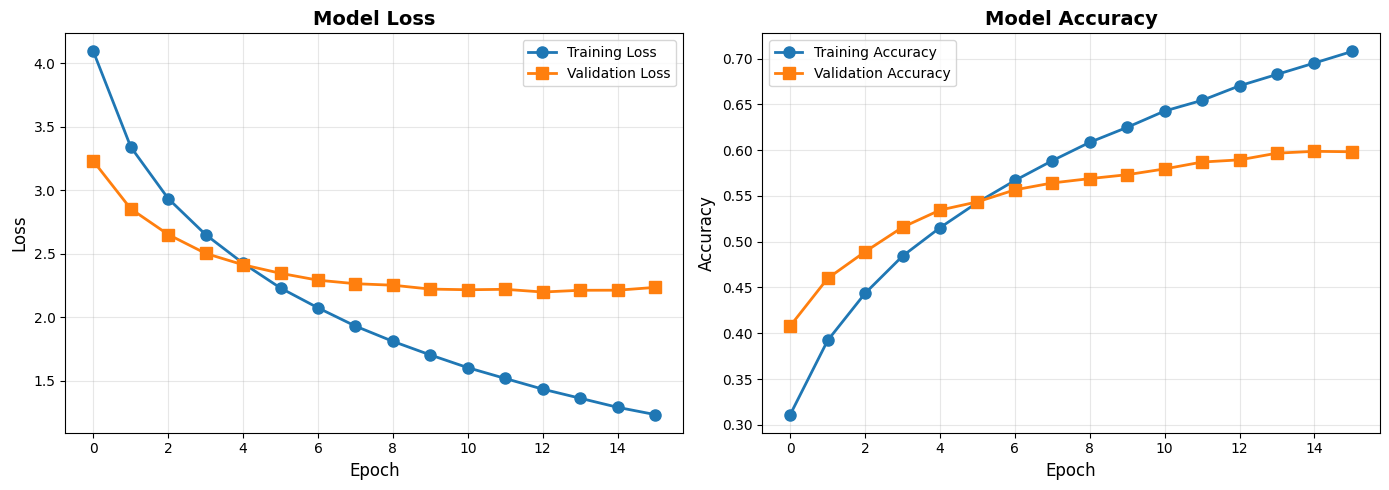

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'o-', label='Training Loss', linewidth=2, markersize=8)
plt.plot(history.history['val_loss'], 's-', label='Validation Loss', linewidth=2, markersize=8)
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['masked_sparse_categorical_accuracy'], 'o-', label='Training Accuracy', linewidth=2, markersize=8)
plt.plot(history.history['val_masked_sparse_categorical_accuracy'], 's-', label='Validation Accuracy', linewidth=2, markersize=8)
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
initial_train_loss = history.history['loss'][0]
final_train_loss = history.history['loss'][-1]
loss_improvement = ((initial_train_loss - final_train_loss) / initial_train_loss) * 100

initial_train_acc = history.history['masked_sparse_categorical_accuracy'][0]
final_train_acc = history.history['masked_sparse_categorical_accuracy'][-1]
acc_improvement = ((final_train_acc - initial_train_acc) / initial_train_acc) * 100

print(f"  Loss improved by: {loss_improvement:.1f}%")
print(f"  Accuracy improved by: {acc_improvement:.1f}%")

  Loss improved by: 69.9%
  Accuracy improved by: 127.4%


In [ ]:
import os

checkpoint_dir = "checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

final_weights_path = f"{checkpoint_dir}/gakegakebro.h5"
model.save_weights(final_weights_path)

print(f"Final model weights saved to: {final_weights_path}")

Final model weights saved to: checkpoints/gakegakebro.h5


In [ ]:
import shutil
shutil.copy("checkpoints/gakegakebro.h5", "/kaggle/working/gakegakebro.h5")


'/kaggle/working/gakegakebro.h5'

In [ ]:
from tqdm import tqdm
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

eval_references = [answers[i] for i in val_idx]

predictions = []

for i in tqdm(range(0, len(val_idx), BATCH_SIZE)):
    batch_input_ids = val_input_ids[i:i+BATCH_SIZE]
    batch_attention_mask = val_attention_mask[i:i+BATCH_SIZE]

    generated_ids = model.generate(
        input_ids=batch_input_ids,
        attention_mask=batch_attention_mask,
        max_length=MAX_TARGET_LENGTH,
        num_beams=4,
        early_stopping=True
    )

    decoded_preds = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
    predictions.extend(decoded_preds)

bleu_scores = []
smoothing = SmoothingFunction()

for ref, pred in zip(eval_references, predictions):
    ref_tokens = ref.split()
    pred_tokens = pred.split()

    score = sentence_bleu(
        [ref_tokens],
        pred_tokens,
        smoothing_function=smoothing.method1
    )
    bleu_scores.append(score)

avg_bleu = np.mean(bleu_scores)
print(f"Average BLEU Score: {avg_bleu:.4f}")

100%|██████████| 8/8 [02:46<00:00, 20.83s/it]

Average BLEU Score: 0.1016


In [ ]:
if ROUGE_AVAILABLE:
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    rouge1_scores = []
    rouge2_scores = []
    rougeL_scores = []

    for ref, pred in zip(eval_references, predictions):
        scores = scorer.score(ref, pred)
        rouge1_scores.append(scores['rouge1'].fmeasure)
        rouge2_scores.append(scores['rouge2'].fmeasure)
        rougeL_scores.append(scores['rougeL'].fmeasure)

    print(f"  ROUGE-1 (F1): {np.mean(rouge1_scores):.4f}")
    print(f"  ROUGE-2 (F1): {np.mean(rouge2_scores):.4f}")
    print(f"  ROUGE-L (F1): {np.mean(rougeL_scores):.4f}")

In [ ]:
total_loss = 0
total_tokens = 0

for batch in val_dataset.take(50):
    inputs, labels = batch
    outputs = model(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        labels=inputs['labels'],
        training=False
    )

    batch_loss = outputs.loss

    mask = tf.not_equal(inputs['labels'], -100)
    num_tokens = tf.reduce_sum(tf.cast(mask, tf.float32))

    total_loss += float(batch_loss) * float(num_tokens)
    total_tokens += float(num_tokens)

perplexity = np.exp(total_loss / total_tokens)
print(f"Perplexity: {perplexity:.4f}")

Perplexity: 9.1979


In [ ]:
all_ref_tokens = []
all_pred_tokens = []

vocab = set()
for ref in eval_references:
    vocab.update(ref.split())
for pred in predictions:
    vocab.update(pred.split())

vocab = sorted(list(vocab))
token_to_idx = {token: idx for idx, token in enumerate(vocab)}

In [ ]:
for ref, pred in zip(eval_references, predictions):
    ref_vec = [1 if token in ref.split() else 0 for token in vocab]
    pred_vec = [1 if token in pred.split() else 0 for token in vocab]
    all_ref_tokens.append(ref_vec)
    all_pred_tokens.append(pred_vec)

all_ref_flat = np.array(all_ref_tokens).flatten()
all_pred_flat = np.array(all_pred_tokens).flatten()

token_f1 = f1_score(all_ref_flat, all_pred_flat, average='binary', zero_division=0)
token_precision = precision_score(all_ref_flat, all_pred_flat, average='binary', zero_division=0)
token_recall = recall_score(all_ref_flat, all_pred_flat, average='binary', zero_division=0)

print(f"  Token Precision: {token_precision:.4f}")
print(f"  Token Recall: {token_recall:.4f}")
print(f"  Token F1 Score: {token_f1:.4f}")

  Token Precision: 0.4413
  Token Recall: 0.2733
  Token F1 Score: 0.3375



  Macro F1 Score: 0.2968

EVALUATION METRICS SUMMARY
         Metric    Score
           BLEU 0.101621
       F1-Score 0.296832
     Perplexity 9.197940
Token Precision 0.441303
   Token Recall 0.273258


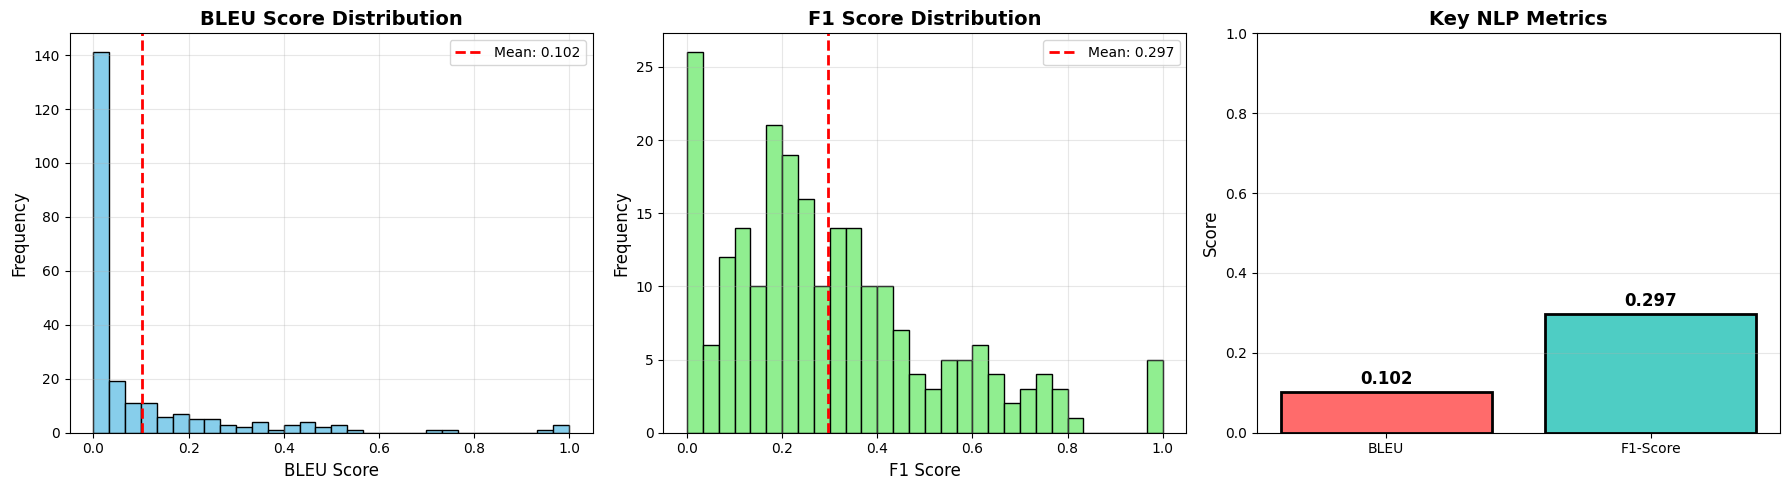

In [ ]:
def calculate_f1_score(references, predictions):
    """Calculate macro-averaged F1 score across all samples"""
    f1_scores = []

    for ref, pred in zip(references, predictions):
        ref_tokens = set(ref.lower().split())
        pred_tokens = set(pred.lower().split())

        if len(pred_tokens) == 0:
            f1_scores.append(0.0)
            continue

        # Calculate precision and recall
        common = ref_tokens.intersection(pred_tokens)
        precision = len(common) / len(pred_tokens) if len(pred_tokens) > 0 else 0
        recall = len(common) / len(ref_tokens) if len(ref_tokens) > 0 else 0

        # Calculate F1
        if precision + recall > 0:
            f1 = 2 * (precision * recall) / (precision + recall)
        else:
            f1 = 0.0

        f1_scores.append(f1)

    return np.mean(f1_scores), f1_scores

macro_f1, f1_scores = calculate_f1_score(eval_references, predictions)
print(f"\n  Macro F1 Score: {macro_f1:.4f}")
metrics_summary = {
    'Metric': ['BLEU', 'F1-Score', 'Perplexity', 'Token Precision', 'Token Recall'],
    'Score': [avg_bleu, macro_f1, perplexity, token_precision, token_recall]
}

if ROUGE_AVAILABLE:
    metrics_summary['Metric'].extend(['ROUGE-1', 'ROUGE-2', 'ROUGE-L'])
    metrics_summary['Score'].extend([np.mean(rouge1_scores), np.mean(rouge2_scores), np.mean(rougeL_scores)])

metrics_df = pd.DataFrame(metrics_summary)

print("\n" + "="*60)
print("EVALUATION METRICS SUMMARY")
print("="*60)
print(metrics_df.to_string(index=False))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(bleu_scores, bins=30, color='skyblue', edgecolor='black')
axes[0].axvline(avg_bleu, color='red', linestyle='--', linewidth=2, label=f'Mean: {avg_bleu:.3f}')
axes[0].set_title('BLEU Score Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('BLEU Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[1].hist(f1_scores, bins=30, color='lightgreen', edgecolor='black')
axes[1].axvline(macro_f1, color='red', linestyle='--', linewidth=2, label=f'Mean: {macro_f1:.3f}')
axes[1].set_title('F1 Score Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('F1 Score', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

key_metrics = ['BLEU', 'F1-Score']
key_scores = [avg_bleu, macro_f1]
colors = ['#FF6B6B', '#4ECDC4']

axes[2].bar(key_metrics, key_scores, color=colors, edgecolor='black', linewidth=2)
axes[2].set_title('Key NLP Metrics', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Score', fontsize=12)
axes[2].set_ylim(0, 1)
axes[2].grid(True, alpha=0.3, axis='y')

for i, (metric, score) in enumerate(zip(key_metrics, key_scores)):
    axes[2].text(i, score + 0.02, f'{score:.3f}', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
def generate_answer(question, max_length=128, num_beams=4, temperature=0.7):
    """Generate answer for a given question"""
    cleaned_question = clean_text_t5(question)
    input_text = f"question: {cleaned_question}"

    inputs = tokenizer(
        input_text,
        return_tensors="tf",
        max_length=MAX_INPUT_LENGTH,
        truncation=True,
        padding='max_length'
    )

    outputs = model.generate(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_length=max_length,
        num_beams=num_beams,
        early_stopping=True,
        no_repeat_ngram_size=2,
        temperature=temperature,
        do_sample=False
    )

    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return answer

In [ ]:
test_questions = [
    "What is the best fertilizer for wheat?",
    "How to control pests in tomato plants?",
    "When should I harvest rice?",
    "What causes yellowing of leaves in crops?",
    "How much water do potato plants need?",
    "Best season for planting corn?",
    "How to prevent fungal diseases in plants?"
]

for i, q in enumerate(test_questions, 1):
    answer = generate_answer(q)
    print(f"\n{i}. Question: {q}")
    print(f"   Answer: {answer}")
    print("-" * 60)

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



1. Question: What is the best fertilizer for wheat?
   Answer: wheat prefers balanced fertilizer with ratio of 10 10 or similar npk nitrogen phosphorus potassium.
------------------------------------------------------------


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



2. Question: How to control pests in tomato plants?
   Answer: effective management of pests in tomato plants involves removing and destroying infected plants. additionally, spraying with mancozeb 0. can help control the disease.
------------------------------------------------------------


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



3. Question: When should I harvest rice?
   Answer: rice should be harvested when the fruit is ready for harvest.
------------------------------------------------------------


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



4. Question: What causes yellowing of leaves in crops?
   Answer: yellowing of leaves in crops is caused by phyllostictina musarum.
------------------------------------------------------------


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



5. Question: How much water do potato plants need?
   Answer: potato plants require regular watering, especially during dry periods and fruit development stages. they prefer consistent moisture levels in the soil but are sensitive to waterlogging.
------------------------------------------------------------


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



6. Question: Best season for planting corn?
   Answer: corn is best planted during the dormant season for planting.
------------------------------------------------------------

7. Question: How to prevent fungal diseases in plants?
   Answer: to prevent fungal diseases in plants, use disease free plants by removing and destroying infected plants.
------------------------------------------------------------
